In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [9]:
# Load the trained model and scaler
model = joblib.load('models/chainguard_model.pkl')
scaler = joblib.load('models/scaler.pkl')

print(f"✅ Model loaded: {type(model).__name__}")
print(f"✅ Scaler loaded: {type(scaler).__name__}")
print("\n🎯 Model is ready for predictions!")

✅ Model loaded: RandomForestClassifier
✅ Scaler loaded: StandardScaler

🎯 Model is ready for predictions!


In [10]:
def analyze_transaction(amount, num_inputs, num_outputs, fee):
    """
    Analyze a blockchain transaction and calculate risk score
    """
    
    risk_score = 15  # Base risk
    risk_factors = []
    
    # 1. Amount-based risk
    if amount > 100:
        risk_score += 30
        risk_factors.append(f"⚠️ Very large amount: {amount} BTC")
    elif amount > 50:
        risk_score += 20
        risk_factors.append(f"⚠️ Large amount: {amount} BTC")
    elif amount > 20:
        risk_score += 10
        risk_factors.append(f"Medium amount: {amount} BTC")
    
    # 2. Input/Output complexity
    total_io = num_inputs + num_outputs
    if total_io > 50:
        risk_score += 25
        risk_factors.append(f"⚠️ High I/O complexity: {total_io} addresses")
    elif total_io > 30:
        risk_score += 15
        risk_factors.append(f"⚠️ Moderate I/O complexity: {total_io} addresses")
    
    # 3. Fee analysis
    if amount > 0:
        expected_fee = amount * 0.0001
        if fee < expected_fee * 0.5:
            risk_score += 20
            risk_factors.append(f"⚠️ Suspiciously low fee: {fee} BTC")
    
    # 4. Mixing pattern detection
    if num_inputs > 5 and num_outputs > 5:
        risk_score += 30
        risk_factors.append(f"🚨 Possible mixing pattern detected")
    
    # Cap at 100
    risk_score = min(100, risk_score)
    
    # CLASSIFICATION
    if risk_score >= 90:
        prediction = "Fraudulent"
        alert_level = "🔴 CRITICAL"
        action = "FREEZE WALLET IMMEDIATELY"
    elif risk_score >= 75:
        prediction = "Fraudulent"
        alert_level = "🟠 HIGH RISK"
        action = "FLAG FOR REVIEW"
    elif risk_score >= 50:
        prediction = "Suspicious"
        alert_level = "🟡 MEDIUM RISK"
        action = "ADD TO WATCHLIST"
    else:
        prediction = "Normal"
        alert_level = "🟢 SAFE"
        action = "CONTINUE MONITORING"
    
    return {
        'Risk Score': risk_score,
        'Classification': prediction,
        'Alert Level': alert_level,
        'Recommended Action': action,
        'Risk Factors': risk_factors
    }

print("✅ Function defined!")

✅ Function defined!


In [11]:
# Define test transactions
test_transactions = [
    ("Small Normal", 0.5, 1, 2, 0.0001),
    ("Medium Normal", 5.0, 2, 3, 0.0005),
    ("Large Normal", 25.0, 3, 4, 0.0025),
    ("Slightly Suspicious", 15.0, 8, 12, 0.0008),
    ("Medium Risk", 30.0, 15, 18, 0.0015),
    ("High Risk - Low Fee", 60.0, 10, 15, 0.00001),
    ("High Risk - Mixing", 45.0, 20, 25, 0.0020),
    ("Critical - Large", 150.0, 30, 40, 0.0050),
    ("Critical - Many I/O", 80.0, 60, 70, 0.000001),
    ("Critical - Perfect Storm", 200.0, 100, 120, 0.0000001),
]

print(f"✅ Created {len(test_transactions)} test transactions")

✅ Created 10 test transactions


In [12]:
# Analyze all test transactions
results = []

print("🔄 Analyzing transactions...\n")

for i, (name, amount, inputs, outputs, fee) in enumerate(test_transactions, 1):
    print(f"📊 Transaction {i}: {name}")
    result = analyze_transaction(amount, inputs, outputs, fee)
    print(f"   Risk: {result['Risk Score']}/100 - {result['Alert Level']}")
    
    results.append({
        'ID': i,
        'Name': name,
        'Amount': amount,
        'Risk_Score': result['Risk Score'],
        'Classification': result['Classification'],
        'Alert': result['Alert Level']
    })

results_df = pd.DataFrame(results)
print(f"\n✅ Analyzed {len(results_df)} transactions")

🔄 Analyzing transactions...

📊 Transaction 1: Small Normal
   Risk: 15/100 - 🟢 SAFE
📊 Transaction 2: Medium Normal
   Risk: 15/100 - 🟢 SAFE
📊 Transaction 3: Large Normal
   Risk: 25/100 - 🟢 SAFE
📊 Transaction 4: Slightly Suspicious
   Risk: 45/100 - 🟢 SAFE
📊 Transaction 5: Medium Risk
   Risk: 70/100 - 🟡 MEDIUM RISK
📊 Transaction 6: High Risk - Low Fee
   Risk: 85/100 - 🟠 HIGH RISK
📊 Transaction 7: High Risk - Mixing
   Risk: 90/100 - 🔴 CRITICAL
📊 Transaction 8: Critical - Large
   Risk: 100/100 - 🔴 CRITICAL
📊 Transaction 9: Critical - Many I/O
   Risk: 100/100 - 🔴 CRITICAL
📊 Transaction 10: Critical - Perfect Storm
   Risk: 100/100 - 🔴 CRITICAL

✅ Analyzed 10 transactions


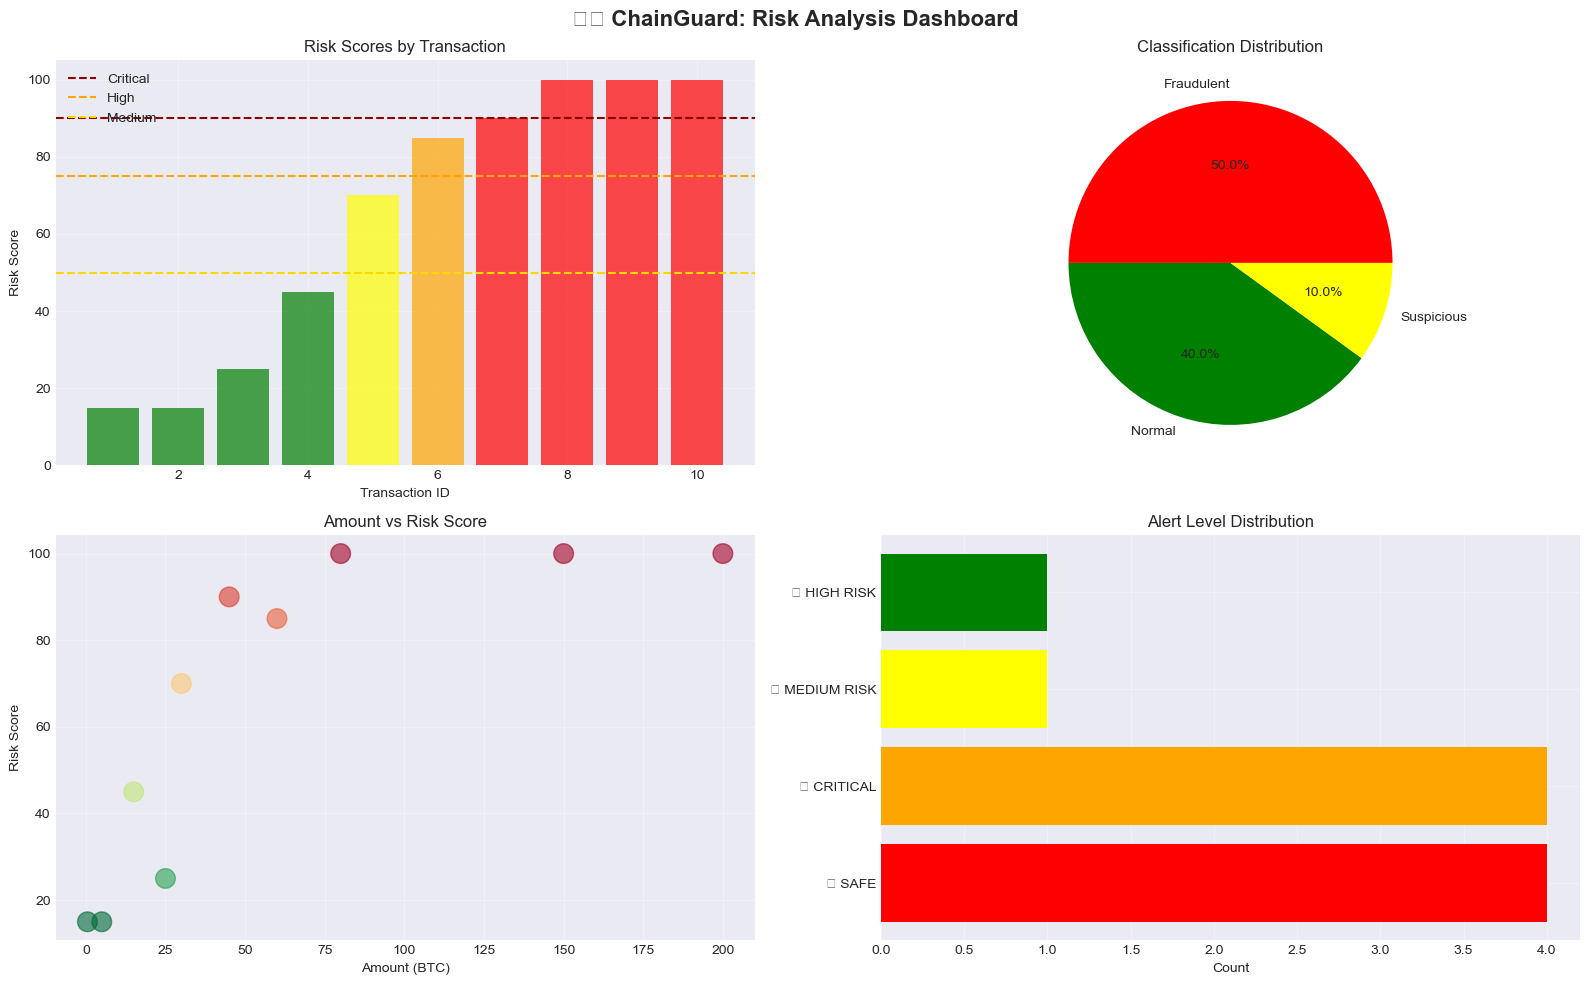

✅ Visualizations generated!


In [13]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('🛡️ ChainGuard: Risk Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Risk Score Bar Chart
colors = ['green' if s < 50 else 'yellow' if s < 75 else 'orange' if s < 90 else 'red' 
          for s in results_df['Risk_Score']]
axes[0, 0].bar(results_df['ID'], results_df['Risk_Score'], color=colors, alpha=0.7)
axes[0, 0].axhline(y=90, color='darkred', linestyle='--', label='Critical')
axes[0, 0].axhline(y=75, color='orange', linestyle='--', label='High')
axes[0, 0].axhline(y=50, color='gold', linestyle='--', label='Medium')
axes[0, 0].set_xlabel('Transaction ID')
axes[0, 0].set_ylabel('Risk Score')
axes[0, 0].set_title('Risk Scores by Transaction')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Classification Pie
classification_counts = results_df['Classification'].value_counts()
colors_pie = {'Normal': 'green', 'Suspicious': 'yellow', 'Fraudulent': 'red'}
pie_colors = [colors_pie.get(c, 'gray') for c in classification_counts.index]
axes[0, 1].pie(classification_counts.values, labels=classification_counts.index, 
               autopct='%1.1f%%', colors=pie_colors)
axes[0, 1].set_title('Classification Distribution')

# 3. Amount vs Risk
axes[1, 0].scatter(results_df['Amount'], results_df['Risk_Score'], 
                   c=results_df['Risk_Score'], cmap='RdYlGn_r', s=200, alpha=0.6)
axes[1, 0].set_xlabel('Amount (BTC)')
axes[1, 0].set_ylabel('Risk Score')
axes[1, 0].set_title('Amount vs Risk Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Alert Distribution
alert_counts = results_df['Alert'].value_counts()
axes[1, 1].barh(range(len(alert_counts)), alert_counts.values, 
                color=['red', 'orange', 'yellow', 'green'])
axes[1, 1].set_yticks(range(len(alert_counts)))
axes[1, 1].set_yticklabels(alert_counts.index)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Alert Level Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizations generated!")

In [14]:
print("="*80)
print("📊 SUMMARY STATISTICS")
print("="*80)
print(f"\nTotal Transactions: {len(results_df)}")
print(f"\nClassifications:")
print(f"  Normal:      {len(results_df[results_df['Classification'] == 'Normal'])}")
print(f"  Suspicious:  {len(results_df[results_df['Classification'] == 'Suspicious'])}")
print(f"  Fraudulent:  {len(results_df[results_df['Classification'] == 'Fraudulent'])}")
print(f"\nRisk Scores:")
print(f"  Average: {results_df['Risk_Score'].mean():.2f}")
print(f"  Maximum: {results_df['Risk_Score'].max():.2f}")
print(f"  Minimum: {results_df['Risk_Score'].min():.2f}")

📊 SUMMARY STATISTICS

Total Transactions: 10

Classifications:
  Normal:      4
  Suspicious:  1
  Fraudulent:  5

Risk Scores:
  Average: 64.50
  Maximum: 100.00
  Minimum: 15.00


In [15]:
# Top 10 riskiest transactions
top_10 = results_df.nlargest(10, 'Risk_Score')

print("="*80)
print("🚨 TOP 10 RISKIEST TRANSACTIONS")
print("="*80)
print(top_10[['ID', 'Name', 'Amount', 'Risk_Score', 'Alert']].to_string(index=False))

🚨 TOP 10 RISKIEST TRANSACTIONS
 ID                     Name  Amount  Risk_Score         Alert
 10 Critical - Perfect Storm   200.0         100    🔴 CRITICAL
  9      Critical - Many I/O    80.0         100    🔴 CRITICAL
  8         Critical - Large   150.0         100    🔴 CRITICAL
  7       High Risk - Mixing    45.0          90    🔴 CRITICAL
  6      High Risk - Low Fee    60.0          85   🟠 HIGH RISK
  5              Medium Risk    30.0          70 🟡 MEDIUM RISK
  4      Slightly Suspicious    15.0          45        🟢 SAFE
  3             Large Normal    25.0          25        🟢 SAFE
  2            Medium Normal     5.0          15        🟢 SAFE
  1             Small Normal     0.5          15        🟢 SAFE


In [16]:
# Save results
output_file = f"demo_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
results_df.to_csv(output_file, index=False)
print(f"✅ Results saved to: {output_file}")

✅ Results saved to: demo_results_20251123_015230.csv
